In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import re
%run functions.py
import pickle

import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE
from sklearn.decomposition import NMF, LatentDirichletAllocation, PCA

from sklearn.mixture import GMM
from sklearn import mixture
from sklearn.mixture import GaussianMixture

from nltk import word_tokenize, sent_tokenize
from nltk.stem import SnowballStemmer, PorterStemmer

from gensim.matutils import Sparse2Corpus
from gensim import models

%matplotlib inline

import matplotlib.gridspec as gridspec

from subprocess import check_output

from wordcloud import WordCloud,STOPWORDS

import warnings
warnings.filterwarnings("ignore")

In [ ]:

df=unpickle_('df_clean.pickle')
count_vectorizer=unpickle_('count_vectorizer.pickle')
count_sparse=unpickle_('count_sparse.pickle')
tfidf_vectorizer=unpickle_('tfidf_vectorizer.pickle')
tfidf_sparse=unpickle_('tfidf_sparse.pickle')


## kmeans clustering

In [245]:
#kmeans clustering model
def kmeans(sparse_matrix, n_clusters):
    model = KMeans(n_clusters=n_clusters, n_jobs=-1)
    model.fit(sparse_matrix)
    clusters = model.predict(sparse_matrix)
    cluster_space = model.transform(sparse_matrix)
    return model, clusters, cluster_space

In [247]:
kmeans_model, clusters, cluster_space = kmeans(tfidf_sparse, n_clusters=15)

In [ ]:
kmeans_model.cluster_centers_.shape

In [257]:
'''pickle_(kmeans_model, c'kmeans_model')
pickle_(clusters, 'clusters')
pickle_(cluster_space, 'cluster_space')
'''
kmeans_model=unpickle_('kmeans_model.pickle')
clusters=unpickle_('clusters.pickle')
cluster_space=unpickle_('cluster_space.pickle')

In [259]:
topic_model2(tfidf_vectorizer, kmeans_model, num_words=30)

Topic 1
['regret', 'arm', 'bandit', 'algorithm', 'bound', 'action', 'reward', 'xt', 'ucb', 'round', 'player', 'game', 'onlin', 'loss', 'log', 'pt', 'optim', 'learn', 'f', 'ft', 'theorem', 'strategi', 'time', 'convex', 'adversari', 'o', 'gt', 'w', 'ln', 'lemma']
Topic 2
['topic', 'document', 'word', 'lda', 'dirichlet', 'latent', 'distribut', 'data', 'languag', 'w', 'learn', 'semant', 'corpu', 'infer', 'algorithm', 'sampl', 'z', 'text', 'train', 'v', 'gibb', 'matrix', 'y', 'paramet', 'vocabulari', 'vector', 'multinomi', 'method', 'log', 'probabl']
Topic 3
['kernel', 'y', 'f', 'learn', 'data', 'featur', 'svm', 'xi', 'h', 'method', 'space', 'matrix', 'z', 'q', 'v', 'algorithm', 'train', 'vector', 'test', 'sampl', 'estim', 'gaussian', 'linear', 'rkh', 'regular', 'w', 'eigenvalu', 'point', 'u', 'regress']
Topic 4
['spike', 'neuron', 'synapt', 'time', 'synaps', 'stimulu', 'rate', 'input', 'neural', 'ms', 'network', 'respons', 'activ', 'popul', 'membran', 'cell', 'postsynapt', 'poisson', 'f', 

In [260]:
kmeans_topicsp_tfidf=scaled_matrix(cluster_space)

In [261]:
top_doc_per_topic(kmeans_topicsp_tfidf, 10, df)


Topic 1
shepard convolutional neural networks
song learning in birds
smart vision chip fabricated using three dimensional integration technology
neural architecture
spectral cues in human sound localization
simulation of a thalamocortical circuit for computing directional heading in the rat
processing of visual and auditory space and its modification by experience
sexnet a neural network identifies sex from human faces
object based analog vlsi vision circuits
making templates rotationally invariant an application to rotated digit recognition

Topic 2
song learning in birds
shepard convolutional neural networks
learning user perceived clusters with feature level supervision
simulation of a thalamocortical circuit for computing directional heading in the rat
orientation selective avlsi spiking neurons
hybrid circuits of interacting computer model and biological neurons
computing nash equilibria in generalized interdependent security games
spiking inputs to a winner take all network
on s

In [262]:
kmeans_tsne_tfidf_2d_model, kmeans_tsne_tfidf_2d_matrix = tsne_model(kmeans_topicsp_tfidf, num_dimensions=2, perplexity=30, n_iter=2000)

In [263]:
pickle_(kmeans_tsne_tfidf_2d_model, 'kmeans_tsne_tfidf_2d_model')
pickle_(kmeans_tsne_tfidf_2d_matrix, 'kmeans_tsne_tfidf_2d_matrix')


In [264]:
df_2d_tsne_kmeans=tsne_df_2D(kmeans_tsne_tfidf_2d_matrix, kmeans_topicsp_tfidf, df)

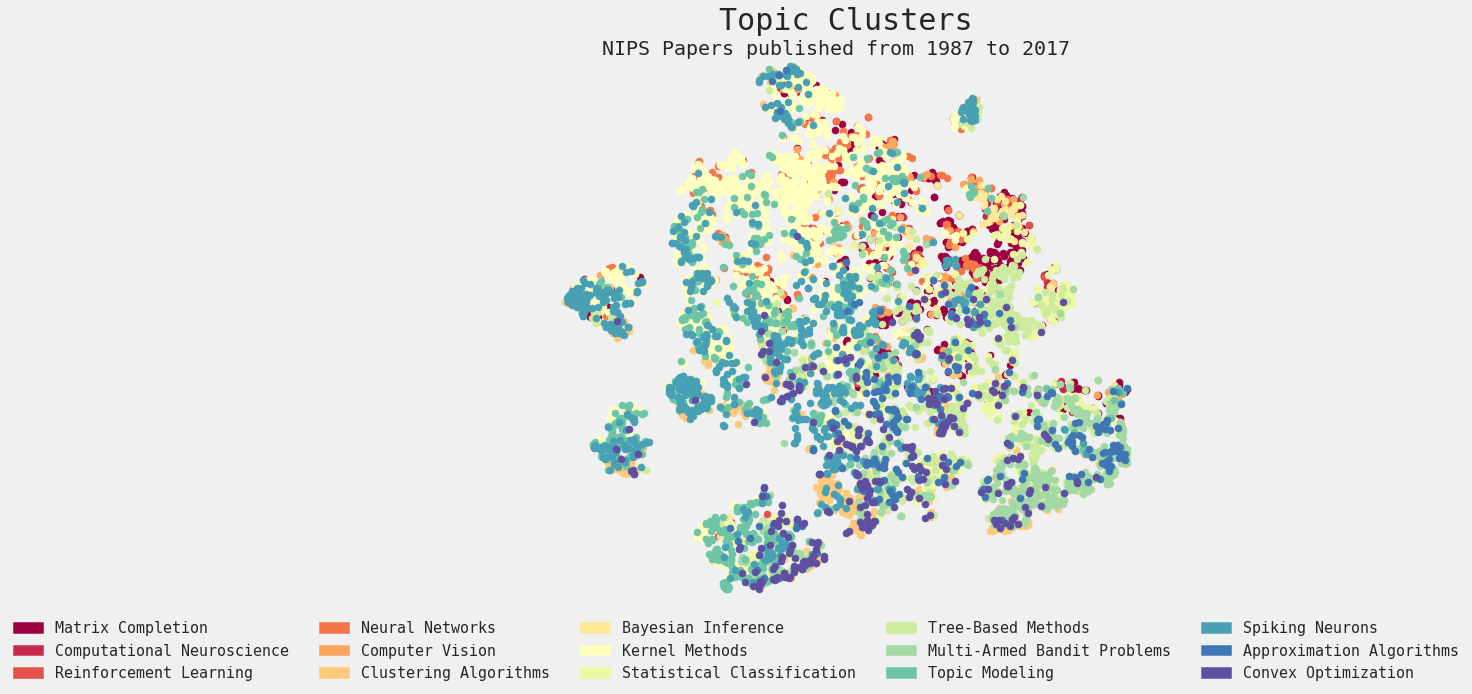

In [265]:
#these topics are not accurate yet
tsne_2d_plot(df_2d_tsne_kmeans, 2017, fifteen_topics)